<a href="https://colab.research.google.com/github/Priyadarshini-yadav13/Time_Series/blob/main/Time_series3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
#importing the data
df=pd.read_csv('/content/multiTimeline.csv')
df.head()

,Month,Diet,Gym,Finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [4]:
# Getting an idea abou the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Month    168 non-null    object
 1   Diet     168 non-null    int64 
 2   Gym      168 non-null    int64 
 3   Finance  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


In [5]:
# Converting the 'Month' to datetime
df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Month    168 non-null    datetime64[ns]
 1   Diet     168 non-null    int64         
 2   Gym      168 non-null    int64         
 3   Finance  168 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.4 KB


In [6]:
# setting the index
df.set_index('Month',inplace=True)

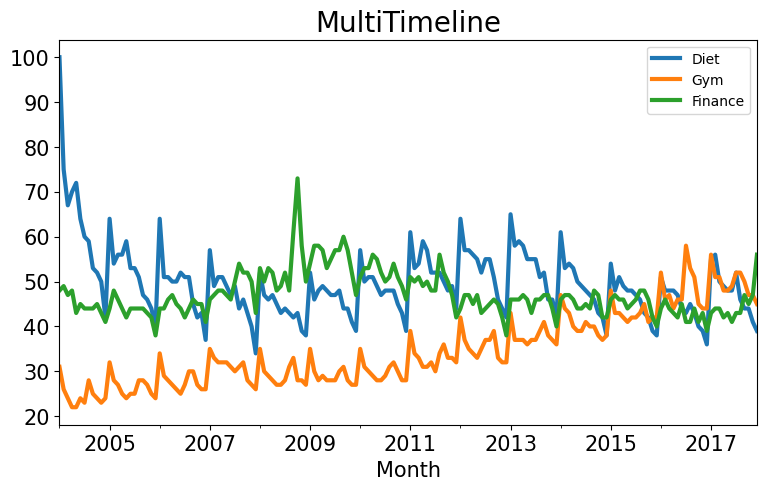

In [7]:
# Plot
df.plot(figsize = (9, 5), linewidth = 3, fontsize = 15)
plt.title('MultiTimeline', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.show()


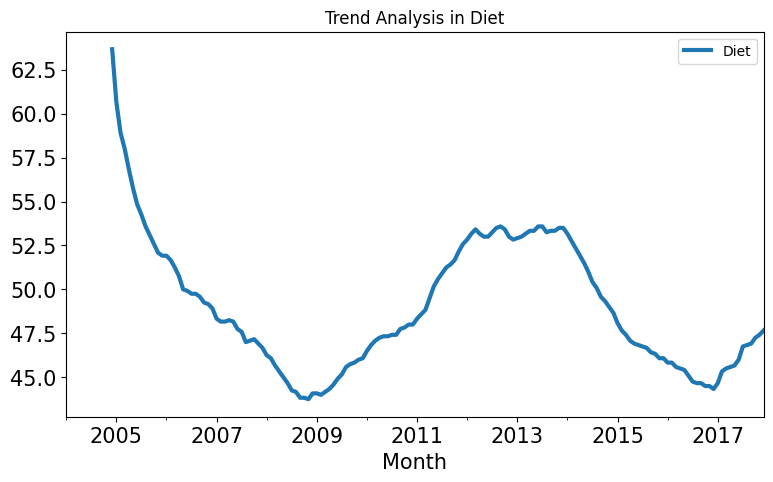

In [8]:
#Checking the trend
diet=df[['Diet']]
diet.rolling(12).mean().plot(figsize=(9,5),linewidth=3,fontsize=15)
plt.title('Trend Analysis in Diet')
plt.xlabel('Month',fontsize=15)
plt.show()


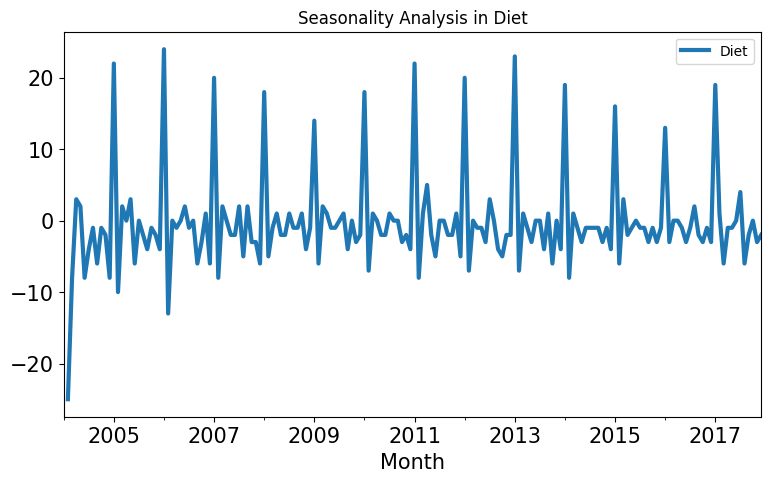

In [9]:
#Check for seasonality
diet.diff().plot(figsize=(9,5),linewidth=3,fontsize=15)
plt.title('Seasonality Analysis in Diet')
plt.xlabel('Month',fontsize=15)
plt.show()

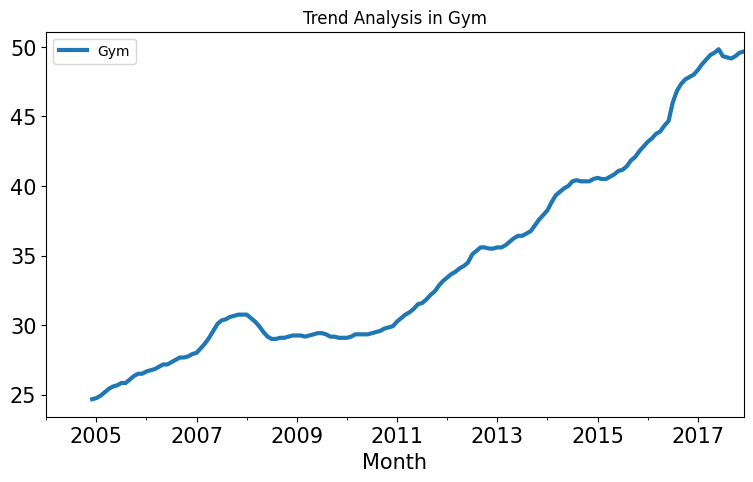

In [10]:
#checking trend for gym
gym=df[['Gym']]
gym.rolling(12).mean().plot(figsize=(9,5),linewidth=3,fontsize=15)
plt.title('Trend Analysis in Gym')
plt.xlabel('Month',fontsize=15)
plt.show()

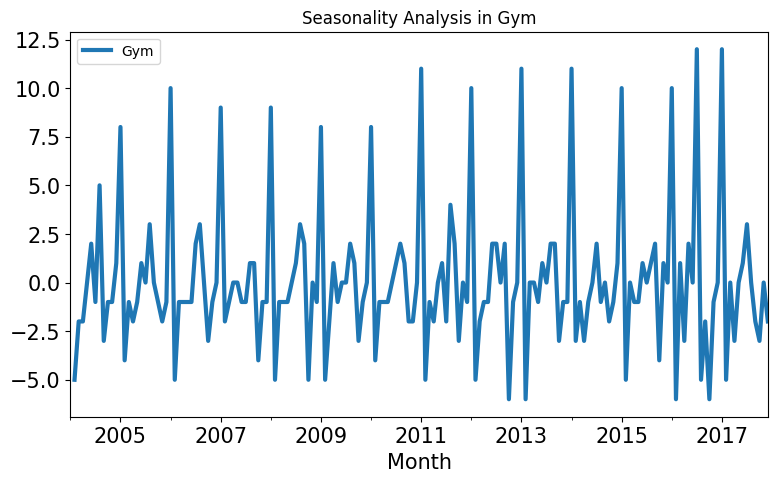

In [11]:
#checking seasonality for gym
gym.diff().plot(figsize=(9,5),linewidth=3,fontsize=15)
plt.title('Seasonality Analysis in Gym')
plt.xlabel('Month',fontsize=15)
plt.show()

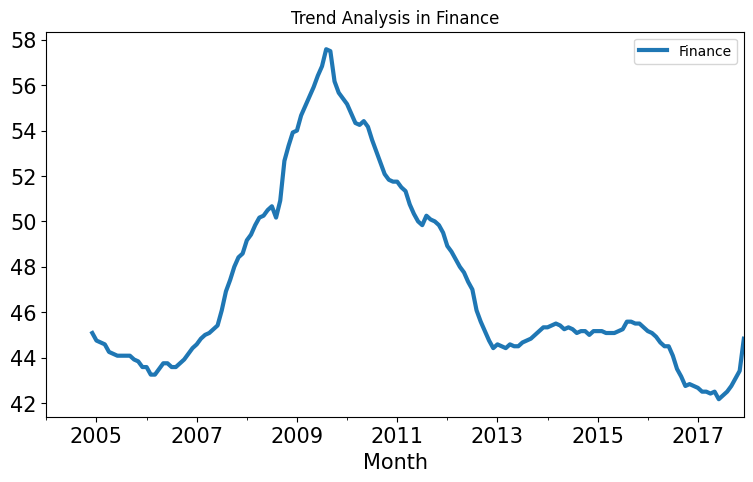

In [12]:
#check trend for finance
finance=df[['Finance']]
finance.rolling(12).mean().plot(figsize=(9,5),linewidth=3,fontsize=15)
plt.title('Trend Analysis in Finance')
plt.xlabel('Month',fontsize=15)
plt.show()


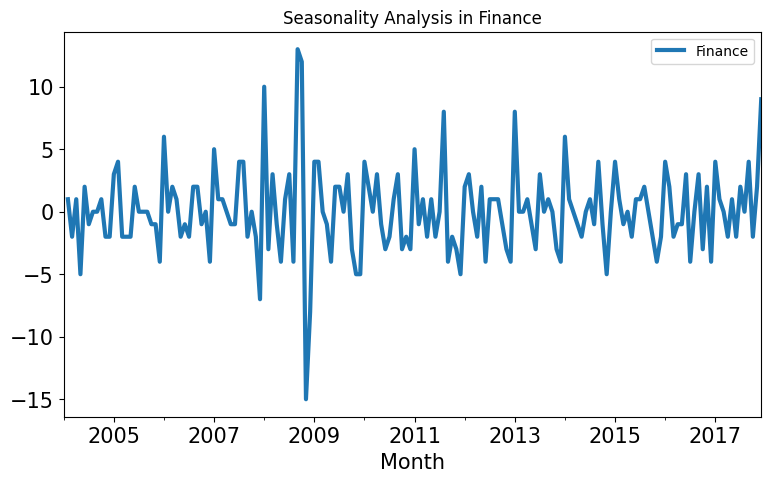

In [13]:
#check seasonality for finance
finance.diff().plot(figsize=(9,5),linewidth=3,fontsize=15)
plt.title('Seasonality Analysis in Finance')
plt.xlabel('Month',fontsize=15)
plt.show()

In [14]:
#ARIMA for diet prediction
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(diet,order=(1,1,1))
model_fit=model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Diet   No. Observations:                  168
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -537.817
Date:                Sat, 19 Jul 2025   AIC                           1081.634
Time:                        16:24:21   BIC                           1090.988
Sample:                    01-01-2004   HQIC                          1085.431
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2604      0.153      1.705      0.088      -0.039       0.560
ma.L1         -0.7273      0.089     -8.161      0.000      -0.902      -0.553
sigma2        36.6219      3.164     11.575      0.0

In [15]:
#SARIMA for diet prediction
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(diet,order=(1,1,1))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Diet   No. Observations:                  168
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -537.817
Date:                Sat, 19 Jul 2025   AIC                           1081.634
Time:                        16:24:21   BIC                           1090.988
Sample:                    01-01-2004   HQIC                          1085.431
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2604      0.153      1.705      0.088      -0.039       0.560
ma.L1         -0.7273      0.089     -8.161      0.000      -0.902      -0.553
sigma2        36.6219      3.164     11.575      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [16]:
#ARIMA for gym prediction
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(gym,order=(1,1,1))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    Gym   No. Observations:                  168
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -428.873
Date:                Sat, 19 Jul 2025   AIC                            863.747
Time:                        16:24:21   BIC                            873.101
Sample:                    01-01-2004   HQIC                           867.543
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2649      0.161      1.647      0.100      -0.050       0.580
ma.L1         -0.8260      0.082    -10.055      0.000      -0.987      -0.665
sigma2         9.9144      0.808     12.273      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [17]:
#SARIMA for gym prediction
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(gym,order=(1,1,1))
model_fit=model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    Gym   No. Observations:                  168
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -428.873
Date:                Sat, 19 Jul 2025   AIC                            863.747
Time:                        16:24:21   BIC                            873.101
Sample:                    01-01-2004   HQIC                           867.543
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2649      0.161      1.647      0.100      -0.050       0.580
ma.L1         -0.8260      0.082    -10.055      0.000      -0.987      -0.665
sigma2         9.9144      0.808     12.273      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [18]:
#ARIMA for finance prediction
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(finance,order=(1,1,1))
model_fit=model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Finance   No. Observations:                  168
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -427.830
Date:                Sat, 19 Jul 2025   AIC                            861.660
Time:                        16:24:22   BIC                            871.014
Sample:                    01-01-2004   HQIC                           865.457
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4131      0.088      4.681      0.000       0.240       0.586
ma.L1         -0.8278      0.065    -12.830      0.000      -0.954      -0.701
sigma2         9.8041      0.647     15.146      0.0

In [19]:
#SARIMA for finance prediction
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(finance,order=(1,1,1))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Finance   No. Observations:                  168
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -427.830
Date:                Sat, 19 Jul 2025   AIC                            861.660
Time:                        16:24:22   BIC                            871.014
Sample:                    01-01-2004   HQIC                           865.457
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4131      0.088      4.681      0.000       0.240       0.586
ma.L1         -0.8278      0.065    -12.830      0.000      -0.954      -0.701
sigma2         9.8041      0.647     15.146      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [20]:
'''
ACF and PACF ->
ACF -> Autocorrelation Plot
PACF -> Partial Autocorrelation Plot

Since, the correlations of time series observation is calculated with values
of the same series at different time lags till time (t), this is called as autocorrelation

A plot for autocorrelation of a datset of a time series by lag is called as ACF plot

SyntaxError: incomplete input (ipython-input-20-3167449007.py, line 1)

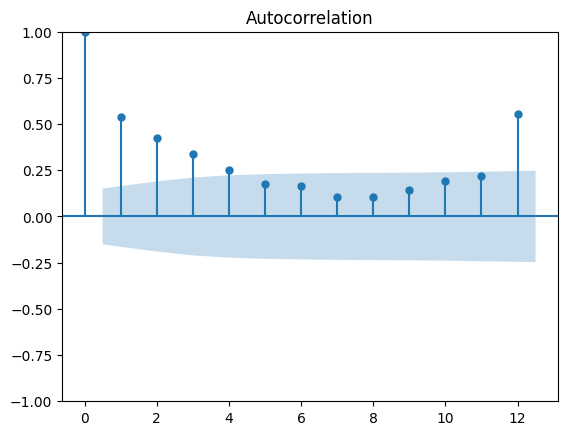

In [21]:
#ACF plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diet,lags=12)
plt.show()

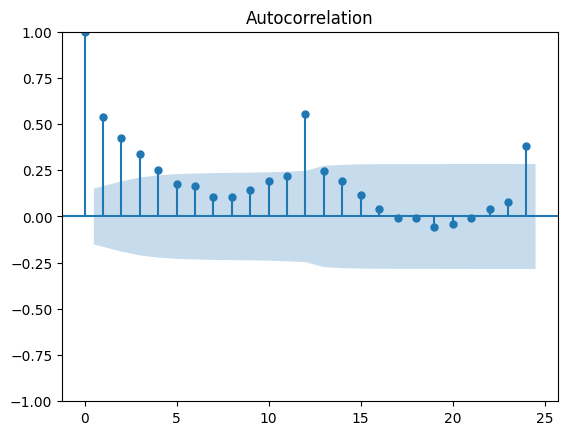

In [22]:
#ACF plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diet,lags=24)
plt.show()

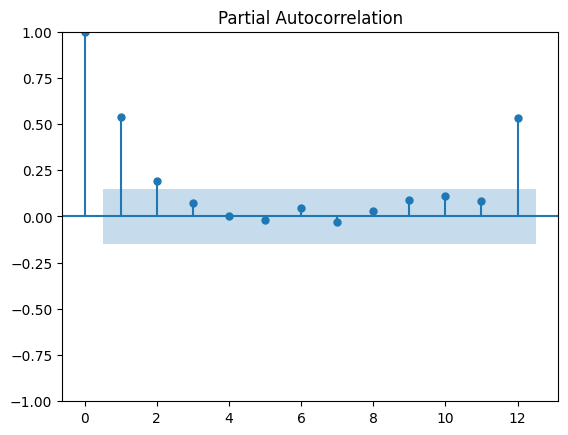

In [23]:
#PACF plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(diet,lags=12)
plt.show()

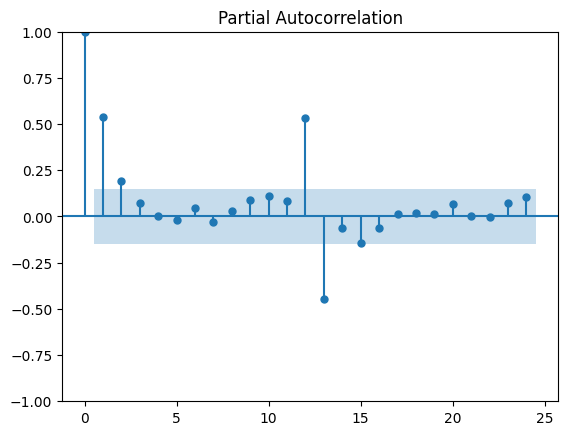

In [24]:
#PACF plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(diet,lags=24)
plt.show()

In [ ]:
'''
Interview Question -> What is the difference between ACF and PACF plot ?

ACF -> ACF measures the correlation between a time series and it's lagged values
PACF -> PACF measures the correlation between a time series and it's lagged value
with effect of intermediate lags
'''